In [213]:
import importlib
import numpy as np
#import fitter
import pandas as pd
from scipy import stats
#importlib.reload(fitter)
from fitter import Fitter, get_common_distributions, get_distributions
from tabulate import tabulate

In [249]:
dataset = pd.read_csv('./data/data_arrhythmia.csv', delimiter=';')

dataset = dataset.to_numpy()
print(dataset)

[[75 0 190 ... 23.3 49.4 8]
 [56 1 165 ... 20.4 38.8 6]
 [54 0 172 ... 12.3 49.0 10]
 ...
 [36 0 166 ... -44.2 -33.2 2]
 [32 1 155 ... 25.0 46.6 1]
 [78 1 160 ... 21.3 32.8 1]]


In [215]:
testFeature = dataset[:,0]

print(testFeature)

[75 56 54 55 75 13 40 49 44 50 62 45 54 30 44 47 47 46 73 57 28 45 36 57
 40 44 34 31 56 51 53 58 50 52 69 44 50 35 62 45 43 40 30 34 40 75 69 30
 41 34 75 28 39 24 52 72 38 42 46 32 1 35 36 27 48 44 54 26 45 64 37 37 31
 46 35 34 45 37 56 71 37 57 79 51 63 75 19 40 68 73 52 64 63 62 25 55 33
 37 52 36 51 39 19 27 36 63 46 57 17 50 71 43 33 9 29 39 74 28 24 58 69 50
 72 71 37 25 58 61 53 46 56 48 39 46 41 40 47 47 35 51 35 1 49 31 34 36 18
 34 39 17 48 32 36 34 27 45 45 60 59 46 42 42 54 24 40 25 68 19 73 40 44
 50 32 56 55 54 64 27 66 56 63 18 44 57 65 61 47 62 22 66 49 60 65 36 44
 27 21 46 13 58 70 64 50 35 33 46 53 62 42 47 11 18 63 53 49 30 17 66 50
 77 47 42 56 83 42 67 37 43 36 49 72 80 22 57 46 45 43 36 56 38 43 62 46
 49 72 60 48 52 44 46 15 58 46 59 66 68 53 45 48 44 33 35 39 38 34 35 58
 50 43 50 72 48 61 63 61 64 32 58 48 31 41 49 57 35 73 65 33 35 57 50 60
 45 40 55 44 33 59 7 12 51 59 63 74 67 31 14 37 53 62 40 41 80 69 70 64 57
 0 52 55 37 3 26 59 54 38 48 58 67 64 59 59

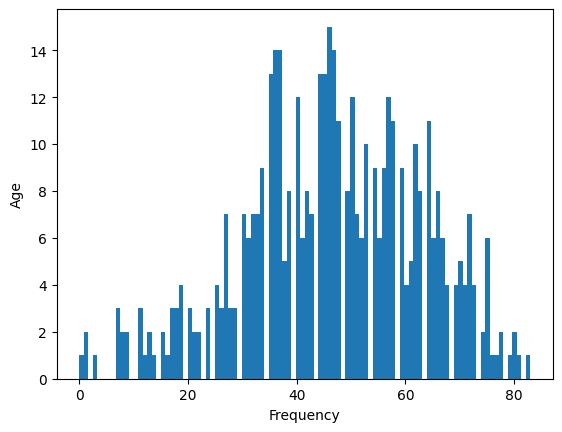

In [11]:
import matplotlib.pyplot as plt
plt.hist(testFeature, bins=100)
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()

Fitting 113 distributions:   0%|          | 0/113 [00:00<?, ?it/s]2024-04-16 22:20:57.206 | WARNING  | __main__:_fit_single_distribution:352 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-04-16 22:20:57.520 | INFO     | __main__:_fit_single_distribution:342 - Fitted cauchy distribution with error=0.451102)
Fitting 113 distributions:   3%|▎         | 3/113 [00:00<00:16,  6.62it/s]2024-04-16 22:20:57.665 | INFO     | __main__:_fit_single_distribution:342 - Fitted dgamma distribution with error=0.243603)
2024-04-16 22:20:57.673 | INFO     | __main__:_fit_single_distribution:342 - Fitted expon distribution with error=3.146027)
2024-04-16 22:20:57.759 | INFO     | __main__:_fit_single_distribution:342 - Fitted anglit distribution with error=0.931701)
Fitting 113 distributions:   5%|▌         | 6/113 [00:00<00:08, 12.92it/s]2024-04-16 22:20:57.817 | INFO     | __main__:_fit_single_distribution:342 - Fitted cosine distribution with error=0.482183)
2024-04-16 22:20:58.283 | INF

               sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponnorm             0.175089  564.617254  579.340520     inf      0.020818   
exponweib             0.175110  567.036721  586.667742     inf      0.019013   
skewnorm              0.175168  565.265480  579.988746     inf      0.020181   
gennorm               0.175170  566.646036  581.369302     inf      0.022761   
genhyperbolic         0.175191  569.157220  593.695997     inf      0.020075   

               ks_pvalue  
exponnorm       0.770793  
exponweib       0.855677  
skewnorm        0.802221  
gennorm         0.669380  
genhyperbolic   0.807332  


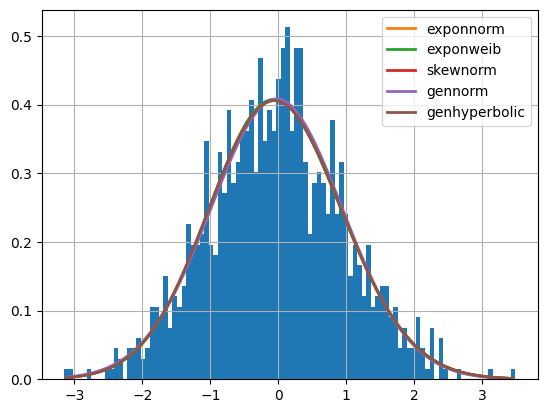

In [127]:
data = np.random.normal(size=1000)
#print(data.shape)
f = Fitter(data)
f.fit(get_common_distributions())
print(f.summary())

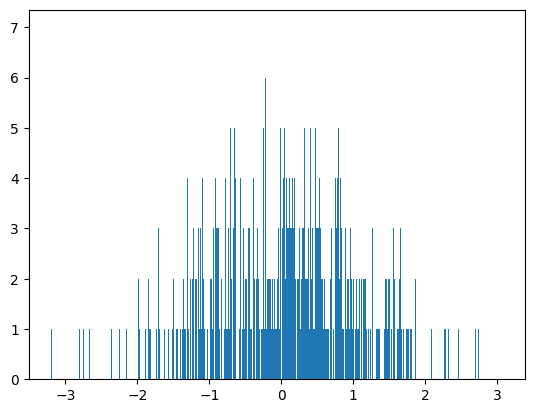

In [15]:
plt.hist(data, bins=1000)
plt.show()

In [ ]:
pdf_fitted = dist.pdf(self.x, *param)

2024-04-16 23:05:54.149 | WARNING  | __main__:_fit_single_distribution:352 - SKIPPED normal distribution (taking more than 1000000 seconds)
2024-04-16 23:05:54.684 | WARNING  | __main__:plot_pdf:426 - normal was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sumsquare_error  aic  bic  kl_div  ks_statistic  ks_pvalue
normal              inf  inf  inf     inf           NaN        NaN


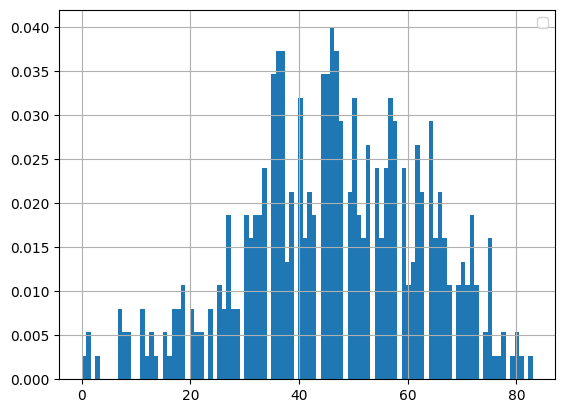

In [161]:
f = Fitter(testFeature, timeout=1000000, distributions=["normal"])
f.fit()
print(f.summary())

In [5]:
import numpy as np
from scipy.stats import norm

0.39894210694751225
(0.0009325069393240764, 1.0022413967169517) 0.0009325069393240764 0 1.0022413967169517


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

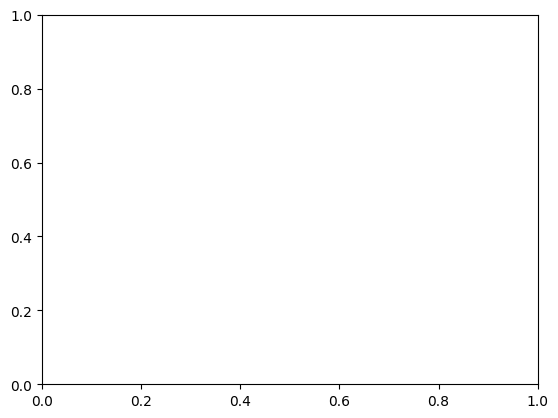

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
size = 30000
x = np.arange(size)
y = np.random.normal(size=1000)
h = plt.hist(y, 30)

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']


params = norm.fit(y)
arg = params[0]
loc = 0
scale = params[1]
pdf_fitted = norm.pdf(arg, loc, scale)
pdf_fit = norm.pdf(arg)
print(pdf_fit)
print(params, arg, loc, scale)
plt.plot(y, pdf_fitted, label="normal")
plt.legend(loc='upper right')
plt.show()

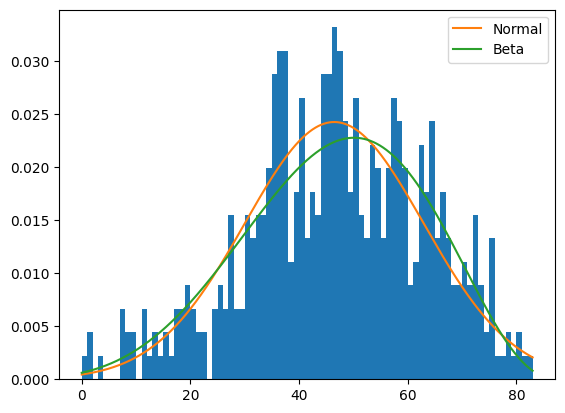

In [6]:

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm, beta
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(testFeature.min(), testFeature.max(), 0.01) 
# Calculating mean and standard deviation 
testFeature_asList = testFeature.tolist()
loc, scale = norm.fit(testFeature_asList)
a1, b1, loc1, scale1 = beta.fit(testFeature_asList)
#mean = statistics.mean(testFeature) 
#sd = statistics.stdev(testFeature)
h = plt.hist(testFeature, bins=83, density=True)
plt.plot(x_axis, norm.pdf(x_axis, loc, scale), label="Normal")
plt.plot(x_axis, beta.pdf(x_axis, a1, b1, loc1, scale1), label="Beta")
#plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label="Manual")
plt.legend(loc='upper right')
def meanSqError(dist, testFeatureRange, h, *args):
    testValues = np.arange(0,testFeatureRange, 1).tolist()
    error = np.sum((dist.pdf(testValues, *args) - h[0]) ** 2)
    return errorplt.show() 

In [328]:
import scipy


def meanSqError(dist,  h, errorList, testFeature, *args):
    testValues = np.unique(testFeature).tolist()
    error = []
    for i in testValues:
        error.append((dist.pdf(i, *args) - h[0][i - testFeature.min() - 1]) ** 2)
    error = np.array(error)
    error = np.sum(error)
    errorList.append((dist, error))

def plot(dist, x_axis, *args):
    distAsStr = str(dist)[32:]
    index = distAsStr.index('_')
    plt.plot(x_axis, dist.pdf(x_axis, *args), label=distAsStr[:index])
    plt.legend(loc='upper right')
    plt.show()

def fit(dist, testFeature, parametersDictionary, errorList, h,  *args):
    testFeature_asList = testFeature.tolist()
    p1, *params = dist.fit(testFeature_asList)
    parametersDictionary[dist] = p1, *params
    meanSqError(dist,  h, errorList, testFeature, p1, *params)
    
def fitAll(testFeature):
    testDistributions = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'cauchy', 'chi2', 'expon', 'gennorm', 'gamma',  'logistic',  'norm', 'trapezoid', 'truncweibull_min'] 
    parametersDictionary = {}
    errorList = []
    x_axis = np.arange(testFeature.min(), testFeature.max(), 0.01)
    testFeatureRange = testFeature.max() - testFeature.min()

    h = plt.hist(testFeature, bins=testFeatureRange + 1, density=True, color="lightcoral")
    for distribution in testDistributions:
        fit(getattr(scipy.stats, distribution), testFeature, parametersDictionary, errorList, h,)

    errorList = sorted(errorList, key=lambda x:x[1])
    topFive = []
    for distributionAndError in errorList[:5]:
        distribution = distributionAndError[0]
        distAsStr = str(distribution)[32:]
        index = distAsStr.index('_')
        distAsStr = distAsStr[:index]
        topFive.append([distAsStr, distributionAndError[1]])
    head = ['Distribution', 'Mean Square Error']
    print(tabulate(topFive, headers=head, tablefmt="grid"))


    for distributionAndError in errorList[:5]:
        distribution = distributionAndError[0]
        parametersForCurrDist = parametersDictionary[distribution]
        distAsStr = str(distribution)[32:]
        index = distAsStr.index('_')
        distAsStr = distAsStr[:index]
        plt.plot(x_axis, distribution.pdf(x_axis, *parametersForCurrDist), label=distAsStr)
    plt.legend(loc='upper right')
    plt.show()


+----------------+---------------------+
| Distribution   |   Mean Square Error |
+================+=====================+
| beta           |          0.00205458 |
+----------------+---------------------+
| norm           |          0.00210578 |
+----------------+---------------------+
| betaprime      |          0.00211152 |
+----------------+---------------------+
| gennorm        |          0.00212308 |
+----------------+---------------------+
| gamma          |          0.00218053 |
+----------------+---------------------+


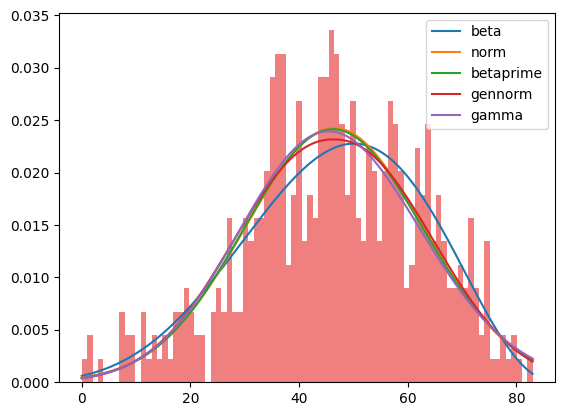

l:\FreeCoding\Research_MathewLau\DOHSC\virtualEnviroment\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
l:\FreeCoding\Research_MathewLau\DOHSC\virtualEnviroment\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


+----------------+---------------------+
| Distribution   |   Mean Square Error |
+================+=====================+
| trapezoid      |          0.00116138 |
+----------------+---------------------+
| bradford       |          0.00151272 |
+----------------+---------------------+
| truncweibull   |          0.00158557 |
+----------------+---------------------+
| expon          |          0.00159189 |
+----------------+---------------------+
| argus          |          0.00172544 |
+----------------+---------------------+


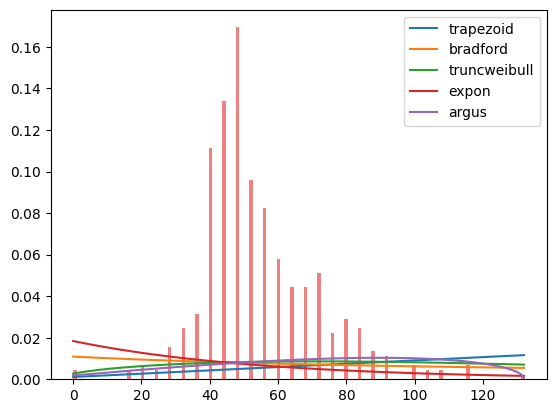

In [331]:
fitAll(dataset[:,0])
fitAll(dataset[:,28])


In [99]:
parametersDictionary = {}
fit(norm, testFeature, parametersDictionary)
fit(beta, testFeature, parametersDictionary)


46.4712389380531 16.448405933617636
6.036668179085172 3.6211374006808934 -23.085983261705948 111.29210574393474
(6.036668179085172, 3.6211374006808934, -23.085983261705948, 111.29210574393474)


0.0019957604265970906
0.0020339838969465553


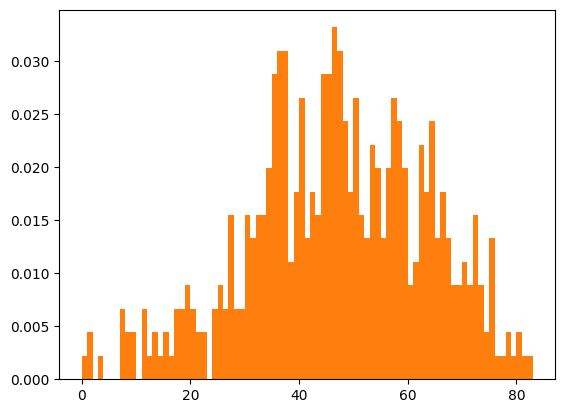

In [41]:
print(meanSqError(norm, 83, loc, scale))
print(meanSqError(beta, 83, a1, b1, loc1, scale1))

In [1]:

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import beta 
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(testFeature.min(), testFeature.max(), 0.01) 
# Calculating mean and standard deviation 
a1, b1, loc1, scale1 = beta.fit(x_axis)
h = plt.hist(testFeature, bins=30, density=True)
plt.plot(x_axis, beta.pdf(x_axis, a1, b1, loc1, scale1), label="Beta")
plt.legend(loc='upper right')
plt.show() 

NameError: name 'testFeature' is not defined

In [148]:
sq_errorBeta = np.sum(beta.pdf(testFeature, a1, b1, loc1, scale1) - x_axis) ** 2
print(sq_errorBeta)

118548338572.90517


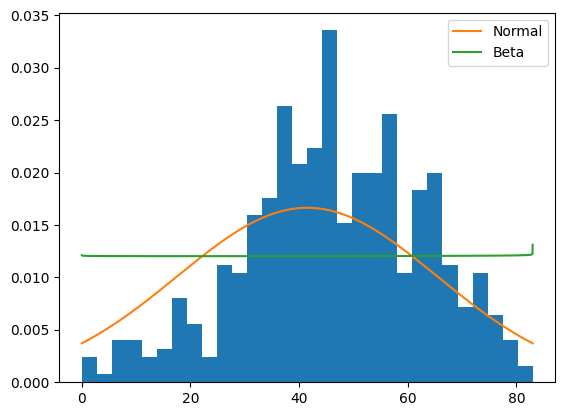

In [146]:
plt.hist(testFeature, bins=30, density=True)
plt.plot(x_axis, norm.pdf(x_axis, loc, scale), label="Normal")
plt.plot(x_axis, beta.pdf(x_axis, a1, b1, loc1, scale1), label="Beta")
plt.legend(loc='upper right')
plt.show() 